<h3>This notebook is used for EDA for the ML section</h3>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [6]:
df = pd.read_csv('../data/data_ml.csv')
df

,year,co2_emissions,gdp,gas_price,ev
0,2001,1855.78,37133.62,1.460,20282
1,2002,1895.48,37997.76,1.386,36042
2,2003,1912.60,39490.27,1.603,47566
3,2004,1967.47,41724.63,1.895,84233
4,2005,1988.14,44123.41,2.314,205876
5,2006,2019.53,46302.00,2.618,251864
6,2007,2022.24,48050.22,2.843,351071
7,2008,1892.33,48570.05,3.299,315763
8,2009,1831.78,47194.94,2.406,290273
9,2010,1845.79,48650.64,2.835,274974


<h3>Checking for correlation patterns amongst variables using Scatterplot Matrix</h3>
<p>Will be helpful in checking for correlation or possible relationships that we can investigate with ML</p>

array([[<AxesSubplot:xlabel='co2_emissions', ylabel='co2_emissions'>,
        <AxesSubplot:xlabel='gdp', ylabel='co2_emissions'>,
        <AxesSubplot:xlabel='gas_price', ylabel='co2_emissions'>,
        <AxesSubplot:xlabel='ev', ylabel='co2_emissions'>],
       [<AxesSubplot:xlabel='co2_emissions', ylabel='gdp'>,
        <AxesSubplot:xlabel='gdp', ylabel='gdp'>,
        <AxesSubplot:xlabel='gas_price', ylabel='gdp'>,
        <AxesSubplot:xlabel='ev', ylabel='gdp'>],
       [<AxesSubplot:xlabel='co2_emissions', ylabel='gas_price'>,
        <AxesSubplot:xlabel='gdp', ylabel='gas_price'>,
        <AxesSubplot:xlabel='gas_price', ylabel='gas_price'>,
        <AxesSubplot:xlabel='ev', ylabel='gas_price'>],
       [<AxesSubplot:xlabel='co2_emissions', ylabel='ev'>,
        <AxesSubplot:xlabel='gdp', ylabel='ev'>,
        <AxesSubplot:xlabel='gas_price', ylabel='ev'>,
        <AxesSubplot:xlabel='ev', ylabel='ev'>]], dtype=object)

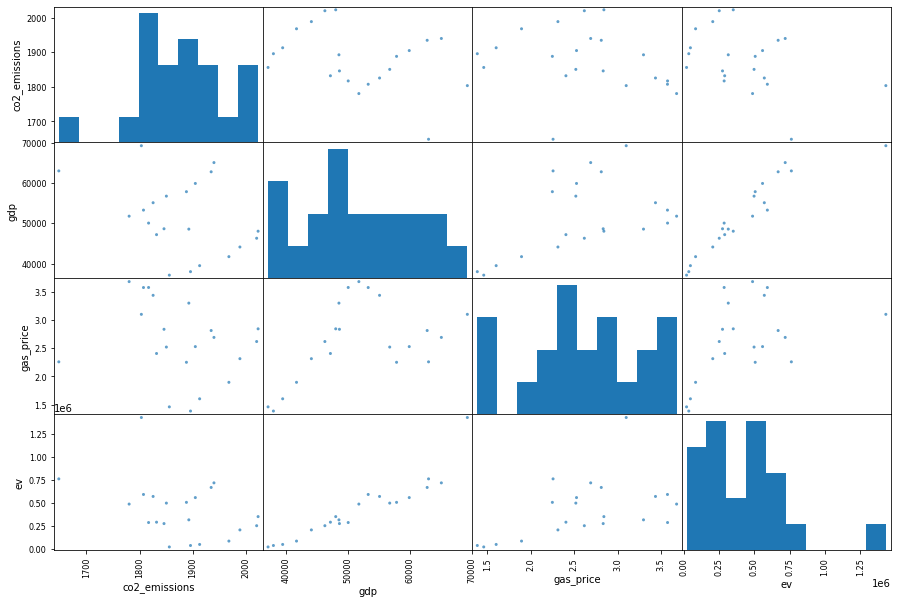

In [7]:
pd.plotting.scatter_matrix(df.iloc[:, 1:], alpha=0.7, figsize=(15, 10))

<h4><u>Observations</u></h4>

<li><u>EV and GDP:</u> There seems to be a strong positive relationship between GDP and EV which makes sense since a rise in GDP means EV is affordable for people in countries that have high GDP.</li>
<br>
<li><u>EV and Gas Price:</u> Theres also a fairly positive correlation existing between rise in gas prices and EV sales which again makes sense since rises in gas prices prompts more people to switch to EV as an efficient option for saving money on fuel in the long-term.</li>
<br>
<li><u>EV and CO2 emissions:</u> Although the relationship isnt that evident, with more EV sales, the CO2 emissions drop, since cars stop relying on fossil fuels. Hence, this can be investigated too.</li>
<br>
<li>CO2, and Gas Price seem to have an outlier but its not clear if there's more. Will be checked in boxplot. However, overall the data looks either symmetrical and slightly positively skewed.</li>

<h4>Exploring the Descriptive Statistics</h4>

Text(0.5, 0.98, 'Box-Plots of each predictor variables')

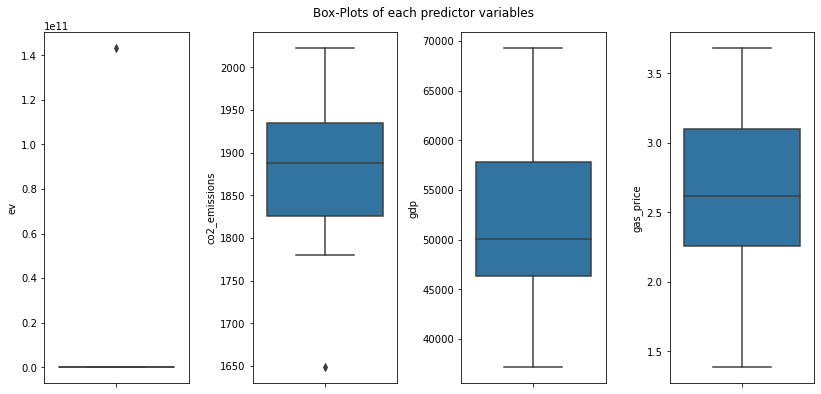

In [19]:
# Checking for outliers
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
fig.tight_layout(pad=3.0)

sns.boxplot(y=df['ev'][df['ev'].isin(max(df['ev']))], orient='v', ax=axs[0])
sns.boxplot(y=df['co2_emissions'], orient='v', ax=axs[1])
sns.boxplot(y=df['gdp'], orient='v', ax=axs[2])
sns.boxplot(y=df['gas_price'], orient='v', ax=axs[3])

fig.suptitle('Box-Plots of each predictor variables')

Text(0.5, 0.98, 'Box-Plots of each predictor variables')

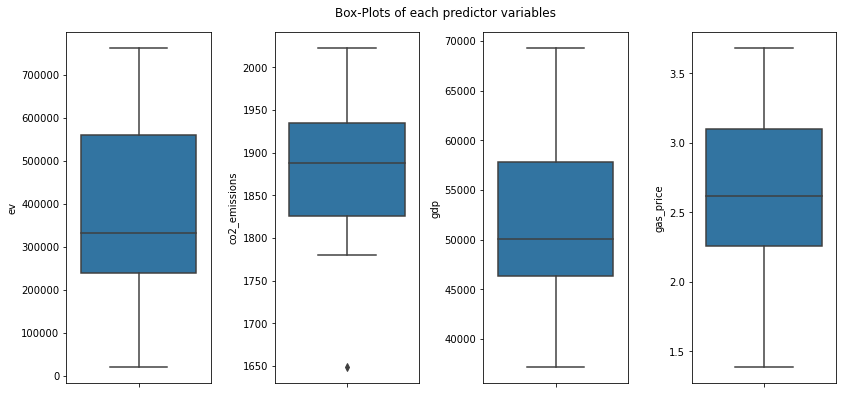

In [14]:
# Checking for outliers
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
fig.tight_layout(pad=3.0)

sns.boxplot(y=df['ev'][df['ev'].apply(lambda x: x != df['ev'].max())], orient='v', ax=axs[0])
sns.boxplot(y=df['co2_emissions'], orient='v', ax=axs[1])
sns.boxplot(y=df['gdp'], orient='v', ax=axs[2])
sns.boxplot(y=df['gas_price'], orient='v', ax=axs[3])

fig.suptitle('Box-Plots of each predictor variables')

In [20]:
def stat_properties(df, col):
    mean, median, range, min, max = df[col].mean(), df[col].median(), df[col].max()-df[col].min(), df[col].min(), df[col].max()
    first_quart, third_quart, iqr = df[col].quantile(0.25), df[col].quantile(0.75), df[col].quantile(0.75)-df[col].quantile(0.25)
    return mean, median, range, first_quart, third_quart, iqr, min, max

statistics_data = {}

statistics_data['properties'] = ['mean', 'range', 'first_quartile (25%)', 'median (50%)', 'third_quartile (75%)', 'interquartile', 'min', 'max']

for column in list(df.columns[1:]):
    mean, median, range, fq, tq, iqr, min, max = stat_properties(df.iloc[:,1:], column)
    statistics_data[column] = [mean, median, range, fq, tq, iqr, min, max]


pd.DataFrame(statistics_data).set_index('properties')

,co2_emissions,gdp,gas_price,ev
properties,,,,
mean,1877.575714,51631.544286,2.62319,6.818812e+09
range,1887.830000,50065.970000,2.61800,3.510710e+05
first_quartile (25%),373.750000,32153.920000,2.29400,1.431875e+11
median (50%),1825.340000,46302.000000,2.25800,2.518640e+05
third_quartile (75%),1934.220000,57866.740000,3.10000,5.710540e+05
interquartile,108.880000,11564.740000,0.84200,3.191900e+05
min,1648.490000,37133.620000,1.38600,2.028200e+04
max,2022.240000,69287.540000,3.68000,1.431875e+11


<h4><u>Observations</u></h4>

<li><u>EV:</u> This feature has one outlier and this was in 2021 which again aligns with the boom in EV sales in US.</li>
<br>
<li><u>Gas Price:</u> They do not have any outliers and the data distribution is fairly symmetric.</li>
<br>
<li><u>CO2 emissions:</u> This feature has one outlier which can affect the model, so this will be investigated as we may need to ignore while training the regression model as it can be affected by outliers.</u></li>
<br>
<li><u>GDP:</u> GDP is positively skewed</li>